In [2]:
import astropy

In [3]:
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('timeseries/kplr010666592-2009131110544_slc.fits')

In [5]:
print(filename)

/home/jcode/.astropy/cache/download/url/aa912021ecabed6ac04cac3a1f4a4d94/contents


In [6]:
ts = TimeSeries.read(filename, format='kepler.fits') 

In [7]:
print(ts)

          time             timecorr   ...   pos_corr1      pos_corr2   
                              d       ...      pix            pix      
----------------------- ------------- ... -------------- --------------
2009-05-02T00:41:40.338  6.630610e-04 ...  1.5822421e-03 -1.4463664e-03
2009-05-02T00:42:39.188  6.630857e-04 ...  1.5743829e-03 -1.4540013e-03
2009-05-02T00:43:38.045  6.631103e-04 ...  1.5665225e-03 -1.4616371e-03
2009-05-02T00:44:36.894  6.631350e-04 ...  1.5586632e-03 -1.4692718e-03
2009-05-02T00:45:35.752  6.631597e-04 ...  1.5508028e-03 -1.4769078e-03
2009-05-02T00:46:34.601  6.631844e-04 ...  1.5429436e-03 -1.4845425e-03
                    ...           ... ...            ...            ...
2009-05-11T18:01:19.065  1.014567e-03 ...  3.6063993e-03  3.1717657e-03
2009-05-11T18:02:17.923  1.014591e-03 ...  3.6044715e-03  3.1640085e-03
2009-05-11T18:03:16.772  1.014615e-03 ...  3.6025438e-03  3.1562524e-03
2009-05-11T18:04:15.630  1.014640e-03 ...  3.6006160e-03  3.1484

In [8]:
ts['sap_flux']

<Quantity [1027045.06, 1027184.44, 1027076.25, ..., 1025451.56, 1025468.5 ,
           1025930.9 ] electron / s>

In [9]:
ts['time', 'sap_flux']

time,sap_flux
,electron / s
Time,float32
2009-05-02T00:41:40.338,1.0270451e+06
2009-05-02T00:42:39.188,1.0271844e+06
2009-05-02T00:43:38.045,1.0270762e+06
2009-05-02T00:44:36.894,1.0271414e+06
2009-05-02T00:45:35.752,1.0271569e+06
2009-05-02T00:46:34.601,1.0272296e+06
...,...
2009-05-11T18:02:17.923,1.0244257e+06


In [ ]:
ts[0:4]

In [ ]:
ts.time

In [ ]:
ts.time.mjd

In [ ]:
ts.time.unix

In [ ]:
ts.time.scale

Text(0, 0.5, 'SAP Flux (e-/s)')

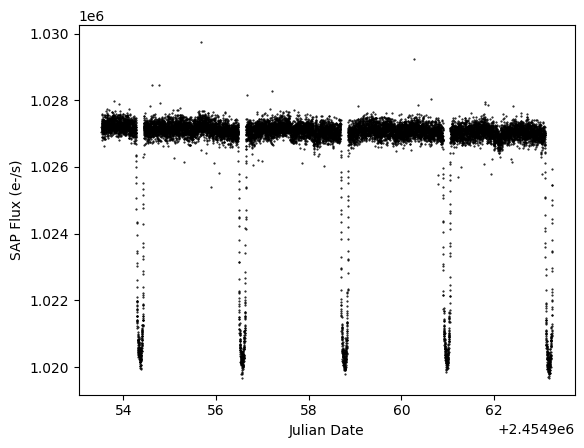

In [11]:
import matplotlib.pyplot as plt
plt.plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1)
plt.xlabel('Julian Date')
plt.ylabel('SAP Flux (e-/s)')

In [12]:
import numpy as np
from astropy import units as u
from astropy.timeseries import BoxLeastSquares
periodogram = BoxLeastSquares.from_timeseries(ts, 'sap_flux')

In [13]:
results = periodogram.autopower(0.2 * u.day)
best = np.argmax(results.power)
period = results.period[best]
period

<Quantity 2.20551724 d>

In [14]:
transit_time = results.transit_time[best]
transit_time

<Time object: scale='tdb' format='isot' value=2009-05-02T20:51:16.338>

In [15]:
ts_folded = ts.fold(period=period, epoch_time=transit_time)

Text(0, 0.5, 'SAP Flux (e-/s)')

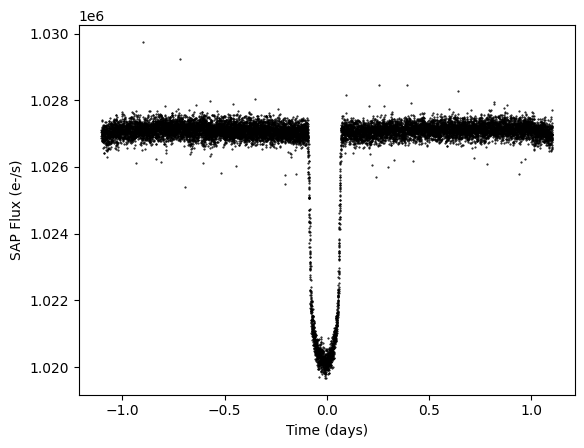

In [16]:
plt.plot(ts_folded.time.jd, ts_folded['sap_flux'], 'k.', markersize=1)
plt.xlabel('Time (days)')
plt.ylabel('SAP Flux (e-/s)')

In [17]:
from astropy.stats import sigma_clipped_stats

In [18]:
mean, median, stddev = sigma_clipped_stats(ts_folded['sap_flux'])
ts_folded['sap_flux_norm'] = ts_folded['sap_flux'] / median

In [20]:
from astropy.timeseries import aggregate_downsample

ts_binned = aggregate_downsample(ts_folded, time_bin_size=0.03 * u.day)  

ts_binned

time_bin_start,time_bin_size,timecorr,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2,sap_flux_norm
,d,d,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix,
TimeDelta,float64,float64,int32,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-1.1022116370482966,0.03,0.0008528293110430241,13195,1026973.3125,140.15341186523438,3746.68212890625,2.2319154739379883,1034719.25,159.33334350585938,186,nan,nan,nan,nan,1041.5578111888517,0.0001344159827567637,613.4819883877723,0.00017141240823548287,0.0009826311143115163,0.00031207725987769663,0.9998741745948792
-1.0722116370482966,0.03,0.0008550441125407815,13285,1027007.4375,140.14646911621094,3753.750244140625,2.231780767440796,1034757.6875,157.7557373046875,377,nan,nan,nan,nan,1041.5577504134303,0.00013433954154606909,613.4822167745142,0.00017133924120571464,0.0009682553354650736,0.00041217938996851444,0.9999074339866638
-1.0422116370482966,0.03,0.0008565832395106554,13347,1027074.6875,140.15179443359375,3748.86181640625,2.2302093505859375,1034825.75,157.19195556640625,188,nan,nan,nan,nan,1041.5577686511494,0.00013433014100883156,613.4820760574382,0.0001713316742097959,0.0009710012236610055,0.00039273229776881635,0.999972939491272
-1.0122116370482965,0.03,0.0008569943020120263,13364,1027110.5625,140.14944458007812,3738.2421875,2.2315773963928223,1034864.1875,157.39439392089844,145,nan,nan,nan,nan,1041.557653652237,0.0001343248732155189,613.482021759561,0.00017132052744273096,0.0008492720662616193,0.0002928022004198283,1.0000077486038208
-0.9822116370482965,0.03,0.0008580777212046087,13408,1027094.5625,140.14981079101562,3725.346923828125,2.229959726333618,1034849.625,156.60211181640625,239,nan,nan,nan,nan,1041.5576283032685,0.00013433363346848637,613.4820869230539,0.00017133451183326542,0.0008298085886053741,0.0003891147789545357,0.9999921917915344
-0.9522116370482965,0.03,0.0008591610821895301,13452,1027113.0625,140.15042114257812,3734.561767578125,2.232150077819824,1034865.4375,156.15545654296875,157,nan,nan,nan,nan,1041.5575716567903,0.00013432394189294428,613.4820772320006,0.0001713206002023071,0.0007625969010405242,0.0003491091774776578,1.0000101327896118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.9377883629517049,0.03,0.0008475192589685321,12979,1027125.5,140.16659545898438,3671.648193359375,2.231222152709961,1034872.0625,159.87144470214844,229,nan,nan,nan,nan,1041.5574239711648,0.0001344349147984758,613.481843799496,0.0001714355021249503,0.0006997043383307755,0.00016979355132207274,1.0000224113464355


Text(0, 0.5, 'Normalized flux')

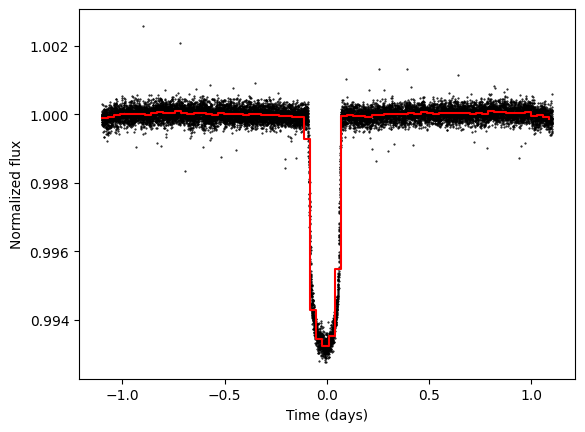

In [21]:
plt.plot(ts_folded.time.jd, ts_folded['sap_flux_norm'], 'k.', markersize=1)
plt.plot(ts_binned.time_bin_start.jd, ts_binned['sap_flux_norm'], 'r-', drawstyle='steps-post')
plt.xlabel('Time (days)')
plt.ylabel('Normalized flux')